# Complete Match Day Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib as mpl
from highlight_text import fig_text

from mplsoccer import Pitch, py_pizza
from utils.metadata import *
from utils.extract_data import *

# Import visualization function
from utils.pass_network_viz import plot_pass_network_1
from utils.radar_plot import plot_radar
from utils.bar_plot import plot_bar
from utils.possession_plot import plot_possession, plot_momentum
from utils.defensive_actions import plot_defensive_actions
from utils.shot_map import plot_shot_map
from utils.key_passes import plot_key_passes
from utils.heatmaps import plot_heatmap
from utils.average_positions import plot_average_positions
from utils.juego_de_posicion import plot_juego

#### Get data

In [2]:
df_home, df_away = load_data('2021', 'gw23')
df_home_goals, df_home_non_goals, df_away_goals, df_away_non_goals = load_understat('gw23')
home_team = df_home_non_goals['team'].iloc[-1]
away_team = df_away_non_goals['team'].iloc[-1]
home_goals = list(df_home_goals['minute'].values)
away_goals = list(df_away_goals['minute'].values)

# Get average locations
home_avg, away_avg = get_average_locations(df_home, df_away)

# Pass Network data
home_avg_locations, home_pass_between, away_avg_locations, away_pass_between = get_pass_network_data(df_home, df_away)
home_pass_between = home_pass_between[home_pass_between['pass_count'] > 3].reset_index(drop=True)
away_pass_between = away_pass_between[away_pass_between['pass_count'] > 5].reset_index(drop=True)

# Bar plot data
home_stats, away_stats = get_bar_plot_data(df_home, df_away, gw='gw23')

# Radar plot data
home_pvals, away_pvals = get_radar_data(df_home, df_away)

# Possession data
df_home_poss, df_away_poss = get_possession_data(df_home, df_away)
added_time = get_added_time(df_home)
home_poss, away_poss = calculate_possession(df_home_poss, df_away_poss)

# Get defensive actions
home_def, home_labels, away_def, away_labels = get_defensive_actions(df_home, df_away)

# Get key passes
home_key_passes, away_key_passes = get_key_passes(df_home, df_away)

# Get offensive heatmap
home_actions, away_actions = get_heatmap_data(df_home, df_away)

# Get juego locations
df_home_juego = get_juego(df_home)
df_away_juego = get_juego(df_away)

#### Create visualization

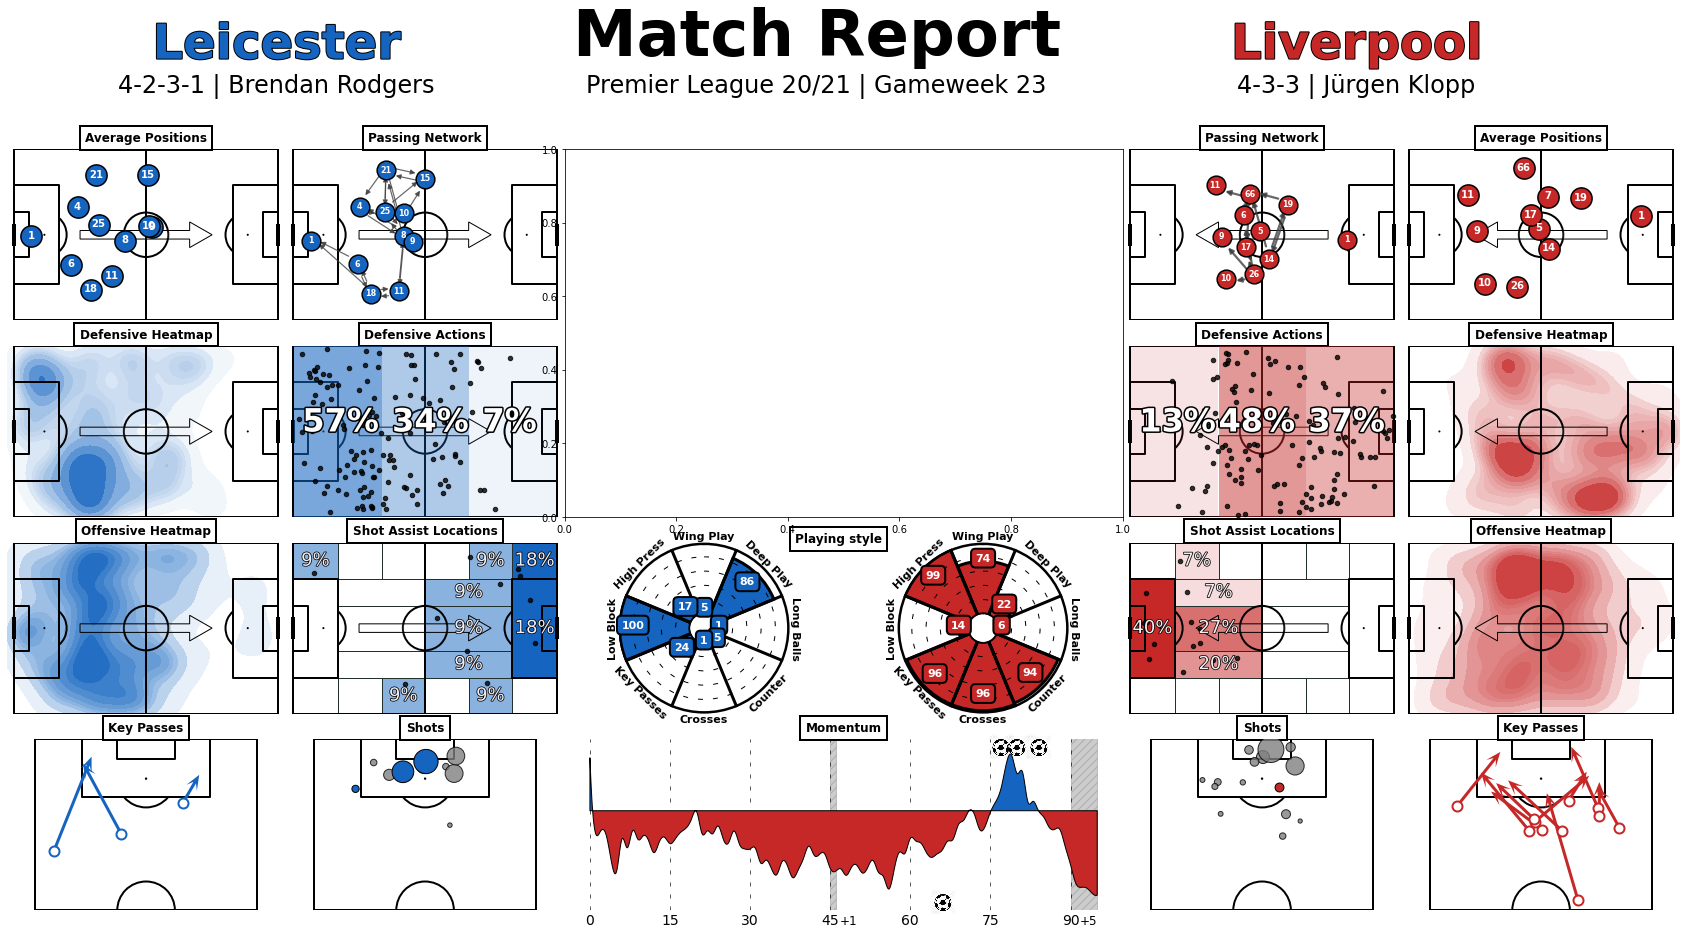

In [3]:
layout = [[1, 2, 23, 23, 3, 4],
          [5, 6, 23, 23, 7, 8],
          [9, 10, 24, 25, 11, 12],
          [27, 28, 26, 26, 29, 30]]

fig, axd = plt.subplot_mosaic(layout, linewidth=2,
                              constrained_layout=True,
                              figsize=(30, 14),
                              gridspec_kw={"width_ratios": [2, 2, 1.5, 1.5, 2, 2],
                                           "width_ratios": [4, 4, 4, 4, 4, 4]})
                              #subplot_kw=dict(ax=axd[24], polar=True))

# Create template pitch
pitch = Pitch(pitch_type='opta',
              pitch_color=pitch_background_color,
              line_color=pitch_line_color,
              line_zorder=2,
              linewidth=2,
              pad_top=0, pad_bottom=0)

path_eff = [path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()]

# Plot pitches
for i in range(1, 13):
    pitch.draw(ax=axd[i], tight_layout=True)
    
# Plot average locations
plot_average_positions(fig, axd[1], home_avg, team='home')
plot_average_positions(fig, axd[4], away_avg, team='away')
    
# Pass Networks
plot_pass_network_1(fig, axd[2], home_avg_locations, home_pass_between, team='home')
plot_pass_network_1(fig, axd[3], away_avg_locations, away_pass_between, team='away')

# Bar plot
plot_bar(fig, axd[23], home_stats, away_stats)
axd[23].tick_params(axis='both', which='both', labelleft=False, left=False, labelbottom=False)

# Radars
plot_radar(fig, axd[24], home_pvals, team='home')
plot_radar(fig, axd[25], away_pvals, team='away')
axd[24].set_frame_on(False)
axd[25].set_frame_on(False)
axd[24].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)
axd[25].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)

# Plot possession
#plot_possession(fig, axd[26], df_home_poss, df_away_poss, added_time)
plot_momentum(fig, axd[26], df_home_poss, df_away_poss, home_goals, away_goals, added_time)

# Plot shot map
plot_shot_map(fig, axd[28], df_home_goals, df_home_non_goals, team='home')
plot_shot_map(fig, axd[29], df_away_goals, df_away_non_goals, team='away')

# Plot key passes map
plot_key_passes(fig, axd[27], home_key_passes, team='home')
plot_key_passes(fig, axd[30], away_key_passes, team='away')

# Plot offensive heatmap
plot_heatmap(fig, axd[9], home_actions, team='home', heatmap_type='offensive')
plot_heatmap(fig, axd[12], away_actions, team='away', heatmap_type='offensive')

# Plot defensive heatmap
plot_heatmap(fig, axd[5], home_def, team='home', heatmap_type='defensive')
plot_heatmap(fig, axd[8], away_def, team='away', heatmap_type='defensive')

# Defensive actions
plot_defensive_actions(fig, axd[6], home_def, home_labels, team='home')
plot_defensive_actions(fig, axd[7], away_def, away_labels, team='away')

# Plot shot assists
plot_juego(fig, axd[10], pitch=pitch, df=df_home_juego, team='home')
plot_juego(fig, axd[11], pitch=pitch, df=df_away_juego, team='away')

# ---------------------------------------------------- #

# Adjust space between subplots
fig.subplots_adjust(hspace=0.15, wspace=0)

# Add title
#home team
fig_text(x=0.25, y=0.96, s=f'<{home_team}>',
         fontsize=48, ha='center', highlight_colors=[home_color], highlight_weights=['bold'], path_effects=path_eff)
fig_text(x=0.25, y=0.93, s=f'4-2-3-1 | Brendan Rodgers',
         fontsize=24, ha='center', highlight_colors=['k'], highlight_weights=['bold'])
#away team
fig_text(x=0.75, y=0.96, s=f'<{away_team}>',
         fontsize=48, ha='center', highlight_colors=[away_color], highlight_weights=['bold'], path_effects=path_eff)
fig_text(x=0.75, y=0.93, s=f'4-3-3 | Jürgen Klopp',
         fontsize=24, ha='center', highlight_colors=['k'], highlight_weights=['bold'])

# Center title
fig_text(x=0.50, y=0.96, s=f'<Match Report>',
         fontsize=64, ha='center', highlight_colors=['k'], highlight_weights=['bold'])#, path_effects=path_eff_1)
fig_text(x=0.50, y=0.93, s=f'Premier League 20/21 | Gameweek 23',
         fontsize=24, ha='center', color='k')#, path_effects=path_eff)
fig.text(x=0.49, y=0.49, s='Playing style',
            color=text_color, alpha=1, weight=600, fontsize=12, zorder=-2,
            bbox=dict(
            facecolor=pitch_background_color, edgecolor=pitch_line_color,
            linewidth=2, alpha=1, boxstyle='Square, pad=0.45', zorder=1
            ))

# Add frame around plot

fig.set_facecolor('w')

plt.savefig('output/match_report.png',
            dpi=600, bbox_inches='tight')

### Plot two viz'

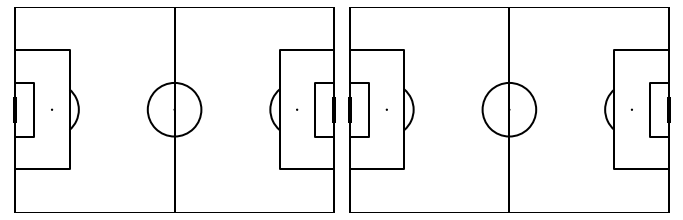

In [4]:
fig, axd = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

pitch = Pitch(pitch_type='opta',
              pitch_color=pitch_background_color,
              line_color=pitch_line_color,
              line_zorder=2,
              linewidth=2,
              pad_top=0, pad_bottom=0)
fig.set_facecolor(pitch_background_color)

# Plot pitches
pitch.draw(ax=axd[0], tight_layout=True)
pitch.draw(ax=axd[1], tight_layout=True)
fig.subplots_adjust(hspace=0.1, wspace=0)

# Pass Networks
#plot_pass_network_1(fig, axd[0], home_avg_locations, home_pass_between, team='home')
#plot_pass_network_1(fig, axd[1], away_avg_locations, away_pass_between, team='away')
# Average positions
#plot_average_positions(fig, axd[0], home_avg, team='home')
#plot_average_positions(fig, axd[1], away_avg, team='away')
# Heatmaps
#plot_heatmap(fig, axd[0], home_actions, team='home', heatmap_type='offensive')
#plot_heatmap(fig, axd[1], away_actions, team='away', heatmap_type='offensive')
#plot_heatmap(fig, axd[0], home_def, team='home', heatmap_type='defensive')
#plot_heatmap(fig, axd[1], away_def, team='away', heatmap_type='defensive')
# Defensive actions
#plot_defensive_actions(fig, axd[0], home_def, home_labels, team='home')
#plot_defensive_actions(fig, axd[1], away_def, away_labels, team='away')
# Plot shot assist
#plot_juego(fig, axd[0], pitch=pitch, df=df_home_juego, team='home')
#plot_juego(fig, axd[1], pitch=pitch, df=df_away_juego, team='away')


#plt.savefig('output/pass_network.png',
#            dpi=600, bbox_inches='tight')

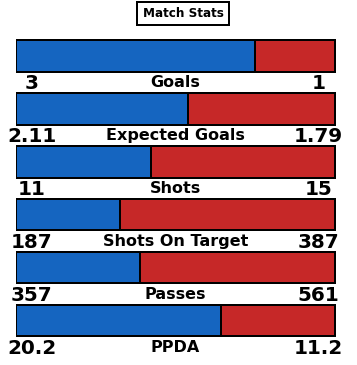

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

fig.set_facecolor(pitch_background_color)

# Barplot
#plot_bar(fig, ax, home_stats, away_stats)
#ax.tick_params(axis='both', which='both', labelleft=False, left=False, labelbottom=False)

# Momentum
#plot_momentum(fig, ax, df_home_poss, df_away_poss, home_goals, away_goals, added_time)

#fig.text((0.515), 0.08, s='+1',
#        fontsize=12, ha='center')
#fig.text((0.85), 0.08, s='+5',
#        fontsize=12, ha='center')


#plt.savefig('output/bar_plot.png',
#            dpi=600, bbox_inches='tight')

In [6]:
'''
fig, axd = plt.subplots(nrows=1, ncols=2, figsize=(16,12))

fig.set_facecolor(pitch_background_color)

# Plot pitches

fig.subplots_adjust(hspace=0, wspace=0)

# Radars
plot_radar(fig, axd[0], home_pvals, team='home')
plot_radar(fig, axd[1], away_pvals, team='away')
axd[0].set_frame_on(False)
axd[1].set_frame_on(False)
axd[0].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)
axd[1].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)

fig.tight_layout()

#plt.savefig('output/radars.png',
#            dpi=600, bbox_inches='tight')
'''

"\nfig, axd = plt.subplots(nrows=1, ncols=2, figsize=(16,12))\n\nfig.set_facecolor(pitch_background_color)\n\n# Plot pitches\n\nfig.subplots_adjust(hspace=0, wspace=0)\n\n# Radars\nplot_radar(fig, axd[0], home_pvals, team='home')\nplot_radar(fig, axd[1], away_pvals, team='away')\naxd[0].set_frame_on(False)\naxd[1].set_frame_on(False)\naxd[0].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)\naxd[1].tick_params(axis='both', which='both', labelleft=False, left=False, bottom=False, labelbottom=False)\n\nfig.tight_layout()\n\n#plt.savefig('output/radars.png',\n#            dpi=600, bbox_inches='tight')\n"

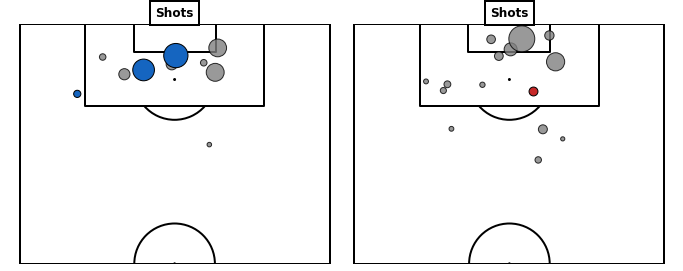

In [9]:
fig, axd = plt.subplots(1,2, figsize=(12,8))

# Plot shot map
#plot_shot_map(fig, axd[0], df_home_goals, df_home_non_goals, team='home')
#plot_shot_map(fig, axd[1], df_away_goals, df_away_non_goals, team='away')
# Plot key passes map
#plot_key_passes(fig, axd[0], home_key_passes, team='home')
#plot_key_passes(fig, axd[1], away_key_passes, team='away')

fig.subplots_adjust(hspace=0, wspace=0)

#plt.savefig('output/shot_maps.png',
#            dpi=600, bbox_inches='tight')